In [1]:
# import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
#read data
train = pd.read_csv('../input/isbankasi/train.csv')
test = pd.read_csv('../input/isbankasi/test_set.csv')

In [3]:
train.head()

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,CUSTOMER,Id
0,279.94,2.0,PESIN,201711,GIYIM / AKSESUAR,19,219,15
1,180.50,13.0,PESIN,201711,CESITLI GIDA,19,219,6
2,141.50,2.0,PESIN,201711,SAGLIK URUNLERI SATISI,19,219,29
3,138.18,4.0,PESIN,201711,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,219,12
4,301.49,8.0,PESIN,201711,MARKET / ALISVERIS MERKEZLERI,19,219,24


In [4]:
test.head()

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,CUSTOMER,Id
0,NaN,2.0,PESIN,201902,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,1,12
1,NaN,21.0,PESIN,201902,RESTORAN / CATERING,19,1,27
2,NaN,4.0,PESIN,201902,KOZMETIK / GUZELLIK,19,1,21
3,NaN,7.0,PESIN,201902,TASIMACILIK,19,1,33
4,NaN,2.0,PESIN,201902,TV YAYINCILIK HIZMETI,19,1,37


In [5]:
train=train.rename(columns={"CUSTOMER": "customer_id", "Id": "sector_id"})
test=test.rename(columns={"CUSTOMER": "customer_id", "Id": "sector_id"})

In [6]:
#islem adedi 0 olan rowlar(bozuk rowlar!!!)

bozuk_ıslem_adedi=train.loc[train["ISLEM_ADEDI"]==0, :]
bozuk_ıslem_adedi

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,customer_id,sector_id
526191,163.32,0.0,PESIN,201801,HAVAYOLLARI,19,4622,16
975422,0.00,0.0,PESIN,201803,TURIZM / KONAKLAMA,19,10570,36
1362660,0.23,0.0,PESIN,201804,RESTORAN / CATERING,17,28692,27
2255607,0.00,0.0,PESIN,201808,SAGLIK HIZMETI,19,10199,28
2618141,0.00,0.0,PESIN,201810,ARAC BAKIM / SERVIS,15,30935,0
2912355,0.00,0.0,PESIN,201811,SAGLIK HIZMETI,18,35845,28
3216139,0.00,0.0,PESIN,201812,SAGLIK HIZMETI,19,1617,28


In [7]:
#bozuk islem adedi rowlarını siliyoruz
train=train.drop(bozuk_ıslem_adedi.index.values)
train

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,customer_id,sector_id
0,279.94,2.0,PESIN,201711,GIYIM / AKSESUAR,19,219,15
1,180.50,13.0,PESIN,201711,CESITLI GIDA,19,219,6
2,141.50,2.0,PESIN,201711,SAGLIK URUNLERI SATISI,19,219,29
3,138.18,4.0,PESIN,201711,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,219,12
4,301.49,8.0,PESIN,201711,MARKET / ALISVERIS MERKEZLERI,19,219,24
...,...,...,...,...,...,...,...,...
3526229,104.84,1.0,TAKSITLI,201901,GIYIM / AKSESUAR,12,8587,15
3526230,81.50,1.0,PESIN,201901,CESITLI GIDA,12,47851,6
3526231,256.88,1.0,PESIN,201901,HIZMET SEKTORLERI,12,47851,17
3526232,44.10,1.0,PESIN,201901,MARKET / ALISVERIS MERKEZLERI,12,47851,24


In [8]:
#bozuk islem tutari yok, hepsi > 0
bozuk_ıslem_tutari=train.loc[train["ISLEM_TUTARI"]==0, :]
bozuk_ıslem_tutari

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,customer_id,sector_id


In [9]:
###Müşteri Harcamaları###

cit = train.groupby(['customer_id'])['ISLEM_TUTARI'].sum().reset_index()

In [10]:
#add customer_id & ISLEM_TUTARI relationship
"""
conditions = [
            cit["ISLEM_TUTARI"] <= 100, 
            np.logical_and(cit["ISLEM_TUTARI"] > 100, cit["ISLEM_TUTARI"] <= 1000),
            np.logical_and(cit["ISLEM_TUTARI"] > 1000, cit["ISLEM_TUTARI"] <= 5000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 5000, cit["ISLEM_TUTARI"] <= 10000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 10000, cit["ISLEM_TUTARI"] <= 50000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 50000, cit["ISLEM_TUTARI"] <= 100000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 100000, cit["ISLEM_TUTARI"] <= 200000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 200000, cit["ISLEM_TUTARI"] <= 300000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 300000, cit["ISLEM_TUTARI"] <= 400000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 400000, cit["ISLEM_TUTARI"] <= 500000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 500000, cit["ISLEM_TUTARI"] <= 600000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 600000, cit["ISLEM_TUTARI"] <= 700000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 700000, cit["ISLEM_TUTARI"] <= 800000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 800000, cit["ISLEM_TUTARI"] <= 900000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 900000, cit["ISLEM_TUTARI"] <= 1000000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 1000000, cit["ISLEM_TUTARI"] <= 2000000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 2000000, cit["ISLEM_TUTARI"] <= 3000000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 3000000, cit["ISLEM_TUTARI"] <= 4000000), 
            np.logical_and(cit["ISLEM_TUTARI"] > 4000000, cit["ISLEM_TUTARI"] <= 5000000)
]

cat_s=['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19']


cit['cit_bin'] = np.select(conditions, cat_s)
"""

'\nconditions = [\n            cit["ISLEM_TUTARI"] <= 100, \n            np.logical_and(cit["ISLEM_TUTARI"] > 100, cit["ISLEM_TUTARI"] <= 1000),\n            np.logical_and(cit["ISLEM_TUTARI"] > 1000, cit["ISLEM_TUTARI"] <= 5000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 5000, cit["ISLEM_TUTARI"] <= 10000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 10000, cit["ISLEM_TUTARI"] <= 50000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 50000, cit["ISLEM_TUTARI"] <= 100000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 100000, cit["ISLEM_TUTARI"] <= 200000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 200000, cit["ISLEM_TUTARI"] <= 300000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 300000, cit["ISLEM_TUTARI"] <= 400000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 400000, cit["ISLEM_TUTARI"] <= 500000), \n            np.logical_and(cit["ISLEM_TUTARI"] > 500000, cit["ISLEM_TUTARI"] <= 600000), \n            np.logical_and(cit["ISLEM_TUTARI"

In [11]:
cit_df=pd.DataFrame(cit["ISLEM_TUTARI"])

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=24, encode='ordinal', strategy='kmeans')
dd=est.fit_transform(cit_df)
len(dd)

cit["cit_bin"]=dd

In [12]:
train = pd.merge(train, cit[['customer_id','cit_bin']], on='customer_id')
test = pd.merge(test, cit[['customer_id','cit_bin']], on='customer_id')

In [13]:
###Müşterilerin İşlem Adedine Göre Sektör Harcaması ###
train["islem_ortalamasi"] = train["ISLEM_TUTARI"] / train["ISLEM_ADEDI"]

csit_mean = train.groupby(['customer_id','SEKTOR','ISLEM_TURU']).mean()
csit_mean=csit_mean.rename(columns={"islem_ortalamasi": "islem_ortalamasi_per_sek_cust_tur"})
csit_mean.reset_index(level=csit_mean.index.names, inplace=True)
csit_mean = csit_mean.drop(columns=['YIL_AY','Record_Count','ISLEM_TUTARI','ISLEM_ADEDI', 'sector_id', 'cit_bin'])

In [14]:
nu=csit_mean.isnull()
csit_mean[nu.any(axis=1)]

,customer_id,SEKTOR,ISLEM_TURU,islem_ortalamasi_per_sek_cust_tur


In [15]:
train = pd.merge(train, csit_mean, how='left', on=['customer_id','SEKTOR','ISLEM_TURU'])
test = pd.merge(test, csit_mean, how='left', on=['customer_id','SEKTOR','ISLEM_TURU'])

In [16]:
#test fill Nan values

fill_values=train.groupby("customer_id").mean()
fill_values_seri=fill_values["islem_ortalamasi"]

fill_df=pd.DataFrame(zip(fill_values_seri.index.values,fill_values_seri.values), columns=["customer_id", "fill_values"])
test=pd.merge(test, fill_df, how='left', on=['customer_id'])

test["islem_ortalamasi_per_sek_cust_tur"]=test["islem_ortalamasi_per_sek_cust_tur"].fillna(test["fill_values"])
test=test.drop(columns=["fill_values"])

In [17]:
test.isnull().sum()

ISLEM_TUTARI                         219663
ISLEM_ADEDI                               0
ISLEM_TURU                                0
YIL_AY                                    0
SEKTOR                                    0
Record_Count                              0
customer_id                               0
sector_id                                 0
cit_bin                                   0
islem_ortalamasi_per_sek_cust_tur         0
dtype: int64

In [18]:
###Müşterilerin Ortalama İşlem Adedi ve Harcaması###

customer_mean = train.groupby('customer_id').mean()
customer_mean=customer_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
customer_mean=customer_mean.rename(columns={'ISLEM_ADEDI':'adet_per_cust','ISLEM_TUTARI':'tutar_per_cust', 'islem_ortalamasi': 'islem_ort_per_cust'})

In [19]:
train = pd.merge(train,customer_mean, how='inner',on='customer_id')
test = pd.merge(test,customer_mean, how='inner',on='customer_id')

In [20]:
#sektör bazli ortalamalar

sek_mean = train.groupby(['SEKTOR']).mean()

sek_mean=sek_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
sek_mean=sek_mean.rename(columns={'ISLEM_ADEDI':'adet_per_sek','ISLEM_TUTARI':'tutar_per_sek', 'islem_ortalamasi': 'islem_ort_per_sek'})


In [21]:
train = pd.merge(train,sek_mean, how='inner',on='SEKTOR')
test = pd.merge(test,sek_mean, how='inner',on='SEKTOR')

In [22]:
test.isnull().sum()

ISLEM_TUTARI                         219663
ISLEM_ADEDI                               0
ISLEM_TURU                                0
YIL_AY                                    0
SEKTOR                                    0
Record_Count                              0
customer_id                               0
sector_id                                 0
cit_bin                                   0
islem_ortalamasi_per_sek_cust_tur         0
adet_per_cust                             0
tutar_per_cust                            0
islem_ort_per_cust                        0
adet_per_sek                              0
tutar_per_sek                             0
islem_ort_per_sek                         0
dtype: int64

In [23]:
#.apply(lambda x: x.strftime('%B-%Y'))

train['YIL_AY'] = pd.to_datetime(train['YIL_AY'], format='%Y%m').dt.to_period('M')
train.head()


test['YIL_AY'] = pd.to_datetime(test['YIL_AY'], format='%Y%m').dt.to_period('M')
test.head()


,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,adet_per_sek,tutar_per_sek,islem_ort_per_sek
0,NaN,2.0,PESIN,2019-02,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,1,12,8.0,135.225095,4.308869,553.709694,170.859018,1.549314,623.39263,463.564847
1,NaN,2.0,PESIN,2019-02,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,2,12,10.0,609.817259,5.452381,1594.864256,534.264626,1.549314,623.39263,463.564847
2,NaN,3.0,PESIN,2019-02,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,3,12,8.0,181.004667,4.259615,589.679583,227.852453,1.549314,623.39263,463.564847
3,NaN,3.0,PESIN,2019-02,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,4,12,7.0,46.222222,5.448845,408.941386,144.893964,1.549314,623.39263,463.564847
4,NaN,1.0,TAKSITLI,2019-02,ELEKTRIK-ELEKTRONIK ESYA / BILGISAYAR,19,4,12,7.0,126.066667,5.448845,408.941386,144.893964,1.549314,623.39263,463.564847


In [24]:
#change dtype of the "YIL_AY" col to be merged
train = train.astype({"YIL_AY": str})
test = test.astype({"YIL_AY": str})

In [25]:
#add mevsim-yıl-ay to df_train
conditions = [
    train["YIL_AY"]=="2017-11",
    train["YIL_AY"]=="2017-12",
    train["YIL_AY"]=="2018-01",
    train["YIL_AY"]=="2018-02",
    train["YIL_AY"]=="2018-03",
    train["YIL_AY"]=="2018-04",
    train["YIL_AY"]=="2018-05",
    train["YIL_AY"]=="2018-06",
    train["YIL_AY"]=="2018-07",
    train["YIL_AY"]=="2018-08",
    train["YIL_AY"]=="2018-09",
    train["YIL_AY"]=="2018-10",
    train["YIL_AY"]=="2018-11",
    train["YIL_AY"]=="2018-12",
    train["YIL_AY"]=="2019-01"    
]

years=['2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2019']
months=['kasim', 'aralik', 'ocak', 'subat', 'mart', 'nisan', 'mayis', 'haziran','temmuz', 'agustos', 'eylul', 'ekim', 'kasim', 'aralik', 'ocak']
seasons=['sonbahar', 'kis', 'kis', 'kis', 'ilkbahar', 'ilkbahar', 'ilkbahar', 'yaz', 'yaz', 'yaz', 'sonbahar', 'sonbahar', 'sonbahar', 'kis', 'kis']


train['year'] = np.select(conditions, years)
train['month'] = np.select(conditions, months)
train['season'] = np.select(conditions, seasons)


In [26]:
#add mevsim-yıl-ay to df_test
conditions = [test["YIL_AY"]=="2019-02"]
years=['2019']
months=['subat']
seasons=['kis']

test['year'] = np.select(conditions, years)
test['month'] = np.select(conditions, months)
test['season'] = np.select(conditions, seasons)

In [27]:
#ay bazli ortalamalar

month_mean = train.groupby(['month']).mean()

month_mean=month_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
month_mean=month_mean.rename(columns={'ISLEM_ADEDI':'adet_per_month','ISLEM_TUTARI':'tutar_per_month', 'islem_ortalamasi': 'islem_ort_per_month'})

train = pd.merge(train, month_mean, how='inner',on='month')
test = pd.merge(test, month_mean, how='inner',on='month')

In [28]:
#yıl bazli ortalamalar

year_mean = train.groupby(['year']).mean()

year_mean=year_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
year_mean=year_mean.rename(columns={'ISLEM_ADEDI':'adet_per_year','ISLEM_TUTARI':'tutar_per_year', 'islem_ortalamasi': 'islem_ort_per_year'})

train = pd.merge(train, year_mean, how='inner',on='year')
test = pd.merge(test, year_mean, how='inner',on='year')

In [29]:
#mevsim bazli ortalamalar

season_mean = train.groupby(['season']).mean()

season_mean=season_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
season_mean=season_mean.rename(columns={'ISLEM_ADEDI':'adet_per_season','ISLEM_TUTARI':'tutar_per_season', 'islem_ortalamasi': 'islem_ort_per_season'})

train = pd.merge(train,season_mean, how='inner',on='season')
test = pd.merge(test,season_mean, how='inner',on='season')

In [30]:
#ay-sektör bazli ortalamalar

ay_sek_mean = train.groupby(['month', 'SEKTOR']).mean()

ay_sek_mean=ay_sek_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
ay_sek_mean=ay_sek_mean.rename(columns={'ISLEM_ADEDI':'adet_per_ay_sek','ISLEM_TUTARI':'tutar_per_ay_sek', 'islem_ortalamasi': 'islem_ort_per_ay_sek'})
ay_sek_mean.reset_index(level=ay_sek_mean.index.names, inplace=True)

train = pd.merge(train, ay_sek_mean, how='inner',on=['month', 'SEKTOR'])
test = pd.merge(test, ay_sek_mean, how='inner',on=['month', 'SEKTOR'])

In [31]:
#mevsim-sektör bazli ortalamalar

mev_sek_mean = train.groupby(['season', 'SEKTOR']).mean()

mev_sek_mean=mev_sek_mean[['ISLEM_ADEDI','ISLEM_TUTARI', 'islem_ortalamasi']]
mev_sek_mean=mev_sek_mean.rename(columns={'ISLEM_ADEDI':'adet_per_mev_sek','ISLEM_TUTARI':'tutar_per_mev_sek', 'islem_ortalamasi': 'islem_ort_per_mev_sek'})
mev_sek_mean.reset_index(level=mev_sek_mean.index.names, inplace=True)

train = pd.merge(train, mev_sek_mean, how='inner',on=['season', 'SEKTOR'])
test = pd.merge(test, mev_sek_mean, how='inner',on=['season', 'SEKTOR'])

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219663 entries, 0 to 219662
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ISLEM_TUTARI                       0 non-null       float64
 1   ISLEM_ADEDI                        219663 non-null  float64
 2   ISLEM_TURU                         219663 non-null  object 
 3   YIL_AY                             219663 non-null  object 
 4   SEKTOR                             219663 non-null  object 
 5   Record_Count                       219663 non-null  int64  
 6   customer_id                        219663 non-null  int64  
 7   sector_id                          219663 non-null  int64  
 8   cit_bin                            219663 non-null  float64
 9   islem_ortalamasi_per_sek_cust_tur  219663 non-null  float64
 10  adet_per_cust                      219663 non-null  float64
 11  tutar_per_cust                     2196

In [33]:
train=train.drop(columns=['islem_ortalamasi'])

Read ek-bilgiler

In [34]:
#read ek_bilgiler 
is_1 = pd.read_csv('../input/ekbilgiler/is1_aylik_degisim_yuzdesi.txt', sep="\t", header=None, decimal=",")
is_2_1 = pd.read_csv('../input/ekbilgiler/is2_bir_oncekiayagore_degisim_yuzdesi.txt', sep="\t", header=None, decimal=",")
is_2_2 = pd.read_csv('../input/ekbilgiler/is2_no_mevsim_pertic_ge.txt', sep="\t", header=None, decimal=",")
is_3d = pd.read_csv('../input/ekbilgiler/is3_tablo_D.txt', sep="\t", header=None, decimal=",")
is_3g = pd.read_csv('../input/ekbilgiler/is3_tablo_G.txt', sep="\t", header=None, decimal=",")
is_4_1 = pd.read_csv('../input/ekbilgiler/is4_bir_onceki_aya_degisim_yuzdesi.txt', sep="\t", header=None, decimal=",")

is_4_2 = pd.read_csv('../input/ekbilgiler/is4_no_mevsim_tuk_ge.txt', sep="\t", header=None, decimal=",")
is_5d = pd.read_csv('../input/ekbilgiler/is5_tablo_D.txt', sep="\t", header=None, decimal=",")
is_5e= pd.read_csv('../input/ekbilgiler/is5_tablo_E.txt', sep="\t", header=None, decimal=",")

is_5l = pd.read_csv('../input/ekbilgiler/is5_tablo_L.txt', sep="\t", header=None, decimal=",")
is_5m = pd.read_csv('../input/ekbilgiler/is5_tablo_M.txt', sep="\t", header=None, decimal=",")
is_5n = pd.read_csv('../input/ekbilgiler/is5_tablo_N.txt', sep="\t", header=None, decimal=",")
is_5s = pd.read_csv('../input/ekbilgiler/is5_tablo_S.txt', sep="\t", header=None, decimal=",")
is_5u = pd.read_csv('../input/ekbilgiler/is5_tablo_U.txt', sep="\t", header=None, decimal=",")
is_6ab = pd.read_csv('../input/ekbilgiler/is6_tablo_AB.txt', sep="\t", header=None, decimal=",")
is_6ae = pd.read_csv('../input/ekbilgiler/is6_tablo_AE.txt', sep="\t", header=None, decimal=",")
is_6c = pd.read_csv('../input/ekbilgiler/is6_tablo_C.txt', sep="\t", header=None, decimal=",")
is_6j = pd.read_csv('../input/ekbilgiler/is6_tablo_J.txt', sep="\t", header=None, decimal=",")
is_6m = pd.read_csv('../input/ekbilgiler/is6_tablo_M', sep="\t", header=None, decimal=",")
is_6r = pd.read_csv('../input/ekbilgiler/is6_tablo_R.txt', sep="\t", header=None, decimal=",")

In [35]:
#now give names for cols
is_1.columns=["YIL_AY_1","aylik_deg_yuzdesi"]
is_2_1.columns=["YIL_AY_1","bir_onceki_aya_deg"]
is_2_2.columns=["YIL_AY_1","no_mevsim_pertic_ge"]
is_3d.columns=["YIL_AY_1","is_3D"]
is_3g.columns=["YIL_AY_1","is_3G"]
is_4_1.columns=["YIL_AY_1","is_4.1"]
is_4_2.columns=["YIL_AY_1","is_4.2"]
is_5d.columns=["YIL_AY_1","is_5D"]
is_5e.columns=["YIL_AY_1","is_5E"]
is_5l.columns=["YIL_AY_1","is_5L"]
is_5m.columns=["YIL_AY_1","is_5M"]
is_5n.columns=["YIL_AY_1","is_5N"]
is_5s.columns=["YIL_AY_1","is_5S"]
is_5u.columns=["YIL_AY_1","is_5U"]
is_6ab.columns=["YIL_AY_1","is_6AB"]
is_6ae.columns=["YIL_AY_1","is_6AE"]
is_6c.columns=["YIL_AY_1","is_6C"]
is_6j.columns=["YIL_AY_1","is_6J"]
is_6m.columns=["YIL_AY_1","is_6M"]
is_6r.columns=["YIL_AY_1","is_6R"]

In [36]:
is_4_1.iloc[11,:]=["2018-10", -2.9]

In [37]:
dfs = [is_1, is_2_1, is_2_2, is_3d, is_3g, is_4_1, is_4_2, is_5d, is_5e, is_5l, is_5m, is_5n, is_5s, is_5u, is_6ab, is_6ae, is_6c, is_6j, is_6m, is_6r]
dfs = [df.set_index('YIL_AY_1') for df in dfs]
df_ek_bilgiler=dfs[0].join(dfs[1:])
df_ek_bilgiler=df_ek_bilgiler.reset_index()

In [38]:
train.head()

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,YIL_AY,SEKTOR,Record_Count,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,...,islem_ort_per_year,adet_per_season,tutar_per_season,islem_ort_per_season,adet_per_ay_sek,tutar_per_ay_sek,islem_ort_per_ay_sek,adet_per_mev_sek,tutar_per_mev_sek,islem_ort_per_mev_sek
0,279.94,2.0,PESIN,2017-11,GIYIM / AKSESUAR,19,219,15,5.0,173.508841,...,217.50864,2.604411,431.379672,235.572943,2.060509,339.913726,176.133259,2.043315,333.27346,174.69588
1,1657.48,4.0,TAKSITLI,2017-11,GIYIM / AKSESUAR,19,219,15,5.0,411.224711,...,217.50864,2.604411,431.379672,235.572943,2.060509,339.913726,176.133259,2.043315,333.27346,174.69588
2,742.12,4.0,PESIN,2017-11,GIYIM / AKSESUAR,19,10655,15,3.0,145.974545,...,217.50864,2.604411,431.379672,235.572943,2.060509,339.913726,176.133259,2.043315,333.27346,174.69588
3,185.00,2.0,PESIN,2017-11,GIYIM / AKSESUAR,19,7060,15,4.0,190.283278,...,217.50864,2.604411,431.379672,235.572943,2.060509,339.913726,176.133259,2.043315,333.27346,174.69588
4,255.89,4.0,PESIN,2017-11,GIYIM / AKSESUAR,19,1945,15,4.0,49.234709,...,217.50864,2.604411,431.379672,235.572943,2.060509,339.913726,176.133259,2.043315,333.27346,174.69588


In [39]:
#merge train&df_ek_bilgiler
dff_ek=pd.merge(train, df_ek_bilgiler, left_on='YIL_AY', right_on='YIL_AY_1', how='left').drop('YIL_AY_1', axis=1)

In [40]:
#merge test&df_ek_bilgiler
dff_test_ek=pd.merge(test, df_ek_bilgiler, left_on='YIL_AY', right_on='YIL_AY_1', how='left').drop('YIL_AY_1', axis=1)

In [41]:
#read doviz
doviz_alis = pd.read_csv('../input/doviz-kur/doviz_als.txt', sep="\t", header=None, decimal=",")
doviz_har_ort = pd.read_csv('../input/doviz-kur/doviz_hareketli_ort.txt', sep="\t", header=None, decimal=",")


#rename cols
doviz_alis.columns=["YIL_AY_2","doviz_alis"]
doviz_har_ort.columns=["YIL_AY_2","doviz_har_ort"]

dfs_doviz = [doviz_alis, doviz_har_ort]
dfs_doviz = [df.set_index('YIL_AY_2') for df in dfs_doviz]
df_ek_doviz=dfs_doviz[0].join(dfs_doviz[1:])
df_ek_doviz=df_ek_doviz.reset_index()


In [42]:
#merge dff_ek&df_ek_doviz
dff=pd.merge(dff_ek, df_ek_doviz, left_on='YIL_AY', right_on='YIL_AY_2', how='left').drop('YIL_AY_2', axis=1)

In [43]:
#merge test&df_ek_bilgiler
dff_test=pd.merge(dff_test_ek, df_ek_doviz, left_on='YIL_AY', right_on='YIL_AY_2', how='left').drop('YIL_AY_2', axis=1)

In [44]:
#drop cols
df_train = dff.drop(columns=["SEKTOR", "Record_Count"])
df_test = dff_test.drop(columns=["SEKTOR", "Record_Count"])

In [45]:
#copy pure train&test sets
#df_test1=df_test.copy()
#df_train1=df_train.copy()
df_test.to_csv("df_test1.csv")

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3526227 entries, 0 to 3526226
Data columns (total 54 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   ISLEM_TUTARI                       float64
 1   ISLEM_ADEDI                        float64
 2   ISLEM_TURU                         object 
 3   YIL_AY                             object 
 4   customer_id                        int64  
 5   sector_id                          int64  
 6   cit_bin                            float64
 7   islem_ortalamasi_per_sek_cust_tur  float64
 8   adet_per_cust                      float64
 9   tutar_per_cust                     float64
 10  islem_ort_per_cust                 float64
 11  adet_per_sek                       float64
 12  tutar_per_sek                      float64
 13  islem_ort_per_sek                  float64
 14  year                               object 
 15  month                              object 
 16  season            

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219663 entries, 0 to 219662
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ISLEM_TUTARI                       0 non-null       float64
 1   ISLEM_ADEDI                        219663 non-null  float64
 2   ISLEM_TURU                         219663 non-null  object 
 3   YIL_AY                             219663 non-null  object 
 4   customer_id                        219663 non-null  int64  
 5   sector_id                          219663 non-null  int64  
 6   cit_bin                            219663 non-null  float64
 7   islem_ortalamasi_per_sek_cust_tur  219663 non-null  float64
 8   adet_per_cust                      219663 non-null  float64
 9   tutar_per_cust                     219663 non-null  float64
 10  islem_ort_per_cust                 219663 non-null  float64
 11  adet_per_sek                       2196

# target encode

In [48]:
#target encoding
def calc_smooth_mean(df, col, label, mean_label, weight):
    # Compute the number of values and the mean of each group
    agg = df.groupby(col)[label].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean_label) / (counts + weight)

    mapping_dict = {key:value for key,value in zip(smooth.index.tolist(), smooth.values.tolist())}
    # Replace each value by the according smoothed mean and return mapping dict
    return df[col].map(smooth), mapping_dict

In [49]:
# Compute the global mean
mean_label = df_train["ISLEM_TUTARI"].mean()
list_mapping_dict = []

list_to_target_enc=["ISLEM_TURU", "customer_id", "sector_id", "year", "month", "season", "cit_bin"]
for col in list_to_target_enc:
    encoded, mapping_dict = calc_smooth_mean(df_train, col, "ISLEM_TUTARI", mean_label, 300)
    downcasted = pd.to_numeric(encoded , downcast='float')
    df_train[col] = downcasted
    list_mapping_dict.append(mapping_dict)

In [50]:
for i, col in enumerate(list_to_target_enc):
    encoded=df_test[col].map(list_mapping_dict[i])
    downcasted = pd.to_numeric(encoded , downcast='float')
    df_test[col]=downcasted

In [51]:
df_train=df_train.drop(columns=["YIL_AY"])
df_test=df_test.drop(columns=["YIL_AY"])

In [52]:
df_train

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,279.94,2.0,366.782562,403.088715,312.730042,594.713318,173.508841,3.131455,376.575399,210.166167,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
1,1657.48,4.0,923.674500,403.088715,312.730042,594.713318,411.224711,3.131455,376.575399,210.166167,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
2,742.12,4.0,366.782562,383.109436,312.730042,317.161316,145.974545,2.057692,271.175673,157.833264,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
3,185.00,2.0,366.782562,411.678223,312.730042,419.609467,190.283278,1.878049,386.715041,273.427821,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
4,255.89,4.0,366.782562,351.648163,312.730042,419.609467,49.234709,3.541667,226.174940,95.552624,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526222,80.00,1.0,366.782562,471.882477,626.817200,852.222473,80.000000,4.000000,547.213116,218.367267,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240
3526223,65.00,1.0,366.782562,423.697388,626.817200,594.713318,65.000000,3.084416,427.173182,229.297557,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240
3526224,50.00,1.0,366.782562,373.237885,626.817200,419.609467,50.000000,3.845745,295.564628,110.938965,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240
3526225,50.00,1.0,366.782562,391.453949,626.817200,192.805649,50.000000,1.574074,222.236111,154.763735,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240


In [53]:
df_test

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,NaN,2.0,366.782562,490.649139,623.008545,2105.567627,135.225095,4.308869,553.709694,170.859018,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
1,NaN,2.0,366.782562,1041.585449,623.008545,5184.400391,609.817259,5.452381,1594.864256,534.264626,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
2,NaN,3.0,366.782562,507.441132,623.008545,2105.567627,181.004667,4.259615,589.679583,227.852453,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
3,NaN,3.0,366.782562,415.394989,623.008545,1307.530151,46.222222,5.448845,408.941386,144.893964,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
4,NaN,1.0,923.674500,415.394989,623.008545,1307.530151,126.066667,5.448845,408.941386,144.893964,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219658,NaN,1.0,366.782562,423.338776,626.817200,249.534973,260.612765,1.814815,431.258889,260.612765,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
219659,NaN,3.0,366.782562,1300.569824,626.817200,3189.774902,10428.956333,1.973684,8237.333158,3996.639772,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
219660,NaN,1.0,366.782562,472.377991,626.817200,317.161316,534.458355,2.076923,860.569231,534.458355,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
219661,NaN,1.0,366.782562,581.700439,626.817200,594.713318,2016.425000,1.086957,2665.882609,2441.515362,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732


In [54]:
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3526227 entries, 0 to 3526226
Data columns (total 34 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   ISLEM_TUTARI                       float64
 1   ISLEM_ADEDI                        float64
 2   ISLEM_TURU                         object 
 3   YIL_AY                             object 
 4   SEKTOR                             object 
 5   Record_Count                       int64  
 6   customer_id                        int64  
 7   sector_id                          int64  
 8   cit_bin                            float64
 9   islem_ortalamasi_per_sek_cust_tur  float64
 10  adet_per_cust                      float64
 11  tutar_per_cust                     float64
 12  islem_ort_per_cust                 float64
 13  adet_per_sek                       float64
 14  tutar_per_sek                      float64
 15  islem_ort_per_sek                  float64
 16  year              

In [55]:
#normalization(make all values bet. 0-1)

df_train_features=df_train.drop(columns=["ISLEM_TUTARI"])
col_names_list=df_train_features.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train_features)
nrmlized_arr=scaler.transform(df_train_features)

normalized_train_df=pd.DataFrame(nrmlized_arr, columns=col_names_list)

In [56]:
normalized_train_df

,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,adet_per_sek,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,0.000469,0.0,0.006826,0.192983,0.026519,0.000492,0.003359,0.001223,0.001039,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
1,0.001408,1.0,0.006826,0.192983,0.026519,0.001167,0.003359,0.001223,0.001039,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
2,0.001408,0.0,0.005472,0.192983,0.011110,0.000414,0.001667,0.000881,0.000780,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
3,0.000469,0.0,0.007407,0.192983,0.016797,0.000540,0.001384,0.001256,0.001351,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
4,0.001408,0.0,0.003341,0.192983,0.016797,0.000140,0.004006,0.000734,0.000472,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526222,0.000000,0.0,0.011485,0.430221,0.040815,0.000227,0.004728,0.001777,0.001079,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927
3526223,0.000000,0.0,0.008221,0.430221,0.026519,0.000184,0.003285,0.001387,0.001133,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927
3526224,0.000000,0.0,0.004804,0.430221,0.016797,0.000142,0.004485,0.000960,0.000548,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927
3526225,0.000000,0.0,0.006038,0.430221,0.004206,0.000142,0.000905,0.000722,0.000765,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927


# test set

In [57]:
df_test.head()

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,NaN,2.0,366.782562,490.649139,623.008545,2105.567627,135.225095,4.308869,553.709694,170.859018,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
1,NaN,2.0,366.782562,1041.585449,623.008545,5184.400391,609.817259,5.452381,1594.864256,534.264626,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
2,NaN,3.0,366.782562,507.441132,623.008545,2105.567627,181.004667,4.259615,589.679583,227.852453,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
3,NaN,3.0,366.782562,415.394989,623.008545,1307.530151,46.222222,5.448845,408.941386,144.893964,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
4,NaN,1.0,923.674500,415.394989,623.008545,1307.530151,126.066667,5.448845,408.941386,144.893964,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732


In [58]:
df_clean_test=df_test.drop(columns='ISLEM_TUTARI')

df_clean_test.head()

,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,adet_per_sek,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,2.0,366.782562,490.649139,623.008545,2105.567627,135.225095,4.308869,553.709694,170.859018,1.549314,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
1,2.0,366.782562,1041.585449,623.008545,5184.400391,609.817259,5.452381,1594.864256,534.264626,1.549314,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
2,3.0,366.782562,507.441132,623.008545,2105.567627,181.004667,4.259615,589.679583,227.852453,1.549314,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
3,3.0,366.782562,415.394989,623.008545,1307.530151,46.222222,5.448845,408.941386,144.893964,1.549314,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732
4,1.0,923.674500,415.394989,623.008545,1307.530151,126.066667,5.448845,408.941386,144.893964,1.549314,...,11.1,6.4,85.5,62.8,84.4,96.9,109.5,92.7,5.262055,5.082732


In [59]:
#using minmax scaler(look up)
test_normalized_arr=scaler.transform(df_clean_test)
normalized_test_df=pd.DataFrame(test_normalized_arr, columns=df_clean_test.columns)

In [60]:
# split df to X and Y
train_y = df_train.loc[:, 'ISLEM_TUTARI'].values  
train_X = normalized_train_df  

In [61]:
normalized_test_df.isnull().sum()

ISLEM_ADEDI                          0
ISLEM_TURU                           0
customer_id                          0
sector_id                            0
cit_bin                              0
islem_ortalamasi_per_sek_cust_tur    0
adet_per_cust                        0
tutar_per_cust                       0
islem_ort_per_cust                   0
adet_per_sek                         0
tutar_per_sek                        0
islem_ort_per_sek                    0
year                                 0
month                                0
season                               0
adet_per_month                       0
tutar_per_month                      0
islem_ort_per_month                  0
adet_per_year                        0
tutar_per_year                       0
islem_ort_per_year                   0
adet_per_season                      0
tutar_per_season                     0
islem_ort_per_season                 0
adet_per_ay_sek                      0
tutar_per_ay_sek         

In [62]:
train_X

,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,adet_per_sek,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,0.000469,0.0,0.006826,0.192983,0.026519,0.000492,0.003359,0.001223,0.001039,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
1,0.001408,1.0,0.006826,0.192983,0.026519,0.001167,0.003359,0.001223,0.001039,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
2,0.001408,0.0,0.005472,0.192983,0.011110,0.000414,0.001667,0.000881,0.000780,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
3,0.000469,0.0,0.007407,0.192983,0.016797,0.000540,0.001384,0.001256,0.001351,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
4,0.001408,0.0,0.003341,0.192983,0.016797,0.000140,0.004006,0.000734,0.000472,0.202107,...,0.264151,0.315789,0.804878,0.925234,0.855556,0.946341,1.000000,0.885281,0.041134,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526222,0.000000,0.0,0.011485,0.430221,0.040815,0.000227,0.004728,0.001777,0.001079,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927
3526223,0.000000,0.0,0.008221,0.430221,0.026519,0.000184,0.003285,0.001387,0.001133,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927
3526224,0.000000,0.0,0.004804,0.430221,0.016797,0.000142,0.004485,0.000960,0.000548,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927
3526225,0.000000,0.0,0.006038,0.430221,0.004206,0.000142,0.000905,0.000722,0.000765,0.015023,...,0.886792,0.789474,0.314363,0.476636,0.425926,0.287805,0.181102,0.290043,0.754610,0.401927


In [63]:
len(train_y)

3526227

In [64]:
train_y

array([ 279.94, 1657.48,  742.12, ...,   50.  ,   50.  ,   20.  ])

In [65]:
normalized_test_df

,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,adet_per_sek,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,0.000469,0.0,0.012756,0.427344,0.110399,0.000384,0.005215,0.001798,0.000844,0.086845,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
1,0.000469,0.0,0.050073,0.427344,0.281331,0.001730,0.007017,0.005179,0.002641,0.086845,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
2,0.000939,0.0,0.013894,0.427344,0.110399,0.000513,0.005137,0.001915,0.001126,0.086845,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
3,0.000939,0.0,0.007659,0.427344,0.066093,0.000131,0.007011,0.001328,0.000716,0.086845,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
4,0.000000,1.0,0.007659,0.427344,0.066093,0.000358,0.007011,0.001328,0.000716,0.086845,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219658,0.000000,0.0,0.008197,0.430221,0.007355,0.000739,0.001284,0.001400,0.001288,0.015023,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
219659,0.000939,0.0,0.067615,0.430221,0.170592,0.029586,0.001534,0.026749,0.019754,0.015023,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
219660,0.000000,0.0,0.011519,0.430221,0.011110,0.001516,0.001697,0.002794,0.002642,0.015023,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015
219661,0.000000,0.0,0.018924,0.430221,0.026519,0.005720,0.000137,0.008657,0.012068,0.015023,...,0.490566,0.263158,0.203252,-0.11215,0.148148,0.317073,0.30315,0.80303,0.574177,1.092015


In [66]:
df_train

,ISLEM_TUTARI,ISLEM_ADEDI,ISLEM_TURU,customer_id,sector_id,cit_bin,islem_ortalamasi_per_sek_cust_tur,adet_per_cust,tutar_per_cust,islem_ort_per_cust,...,is_5S,is_5U,is_6AB,is_6AE,is_6C,is_6J,is_6M,is_6R,doviz_alis,doviz_har_ort
0,279.94,2.0,366.782562,403.088715,312.730042,594.713318,173.508841,3.131455,376.575399,210.166167,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
1,1657.48,4.0,923.674500,403.088715,312.730042,594.713318,411.224711,3.131455,376.575399,210.166167,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
2,742.12,4.0,366.782562,383.109436,312.730042,317.161316,145.974545,2.057692,271.175673,157.833264,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
3,185.00,2.0,366.782562,411.678223,312.730042,419.609467,190.283278,1.878049,386.715041,273.427821,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
4,255.89,4.0,366.782562,351.648163,312.730042,419.609467,49.234709,3.541667,226.174940,95.552624,...,9.9,6.6,107.7,96.1,103.5,109.8,127.2,96.5,3.879050,3.615042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526222,80.00,1.0,366.782562,471.882477,626.817200,852.222473,80.000000,4.000000,547.213116,218.367267,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240
3526223,65.00,1.0,366.782562,423.697388,626.817200,594.713318,65.000000,3.084416,427.173182,229.297557,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240
3526224,50.00,1.0,366.782562,373.237885,626.817200,419.609467,50.000000,3.845745,295.564628,110.938965,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240
3526225,50.00,1.0,366.782562,391.453949,626.817200,192.805649,50.000000,1.574074,222.236111,154.763735,...,13.2,8.4,89.6,81.7,91.9,96.3,106.4,69.0,5.730194,4.155240


In [67]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12986 sha256=0e5d23c38e768986138282017082e99ca2f78ebf18798b567895821382f6e7cf
  Stored in directory: /root/.cache/pip/wheels/d0/1f/c4/e619fb20c9b10df8ddde15d583197edef8c2f27d7b1f29c633
Successfully built ppscore


In [68]:
del train
del test

# pearson correlation matrix

In [69]:
corrMatrix = df_train.corr()
corrMatrix["ISLEM_TUTARI"]

ISLEM_TUTARI                         1.000000
ISLEM_ADEDI                          0.211015
ISLEM_TURU                           0.071327
customer_id                          0.484949
sector_id                            0.101156
cit_bin                              0.372388
islem_ortalamasi_per_sek_cust_tur    0.724538
adet_per_cust                        0.098374
tutar_per_cust                       0.615227
islem_ort_per_cust                   0.554252
adet_per_sek                        -0.005203
tutar_per_sek                        0.101164
islem_ort_per_sek                    0.090617
year                                 0.004794
month                                0.008655
season                               0.005906
adet_per_month                       0.007011
tutar_per_month                      0.008655
islem_ort_per_month                  0.008415
adet_per_year                        0.004713
tutar_per_year                       0.004794
islem_ort_per_year                

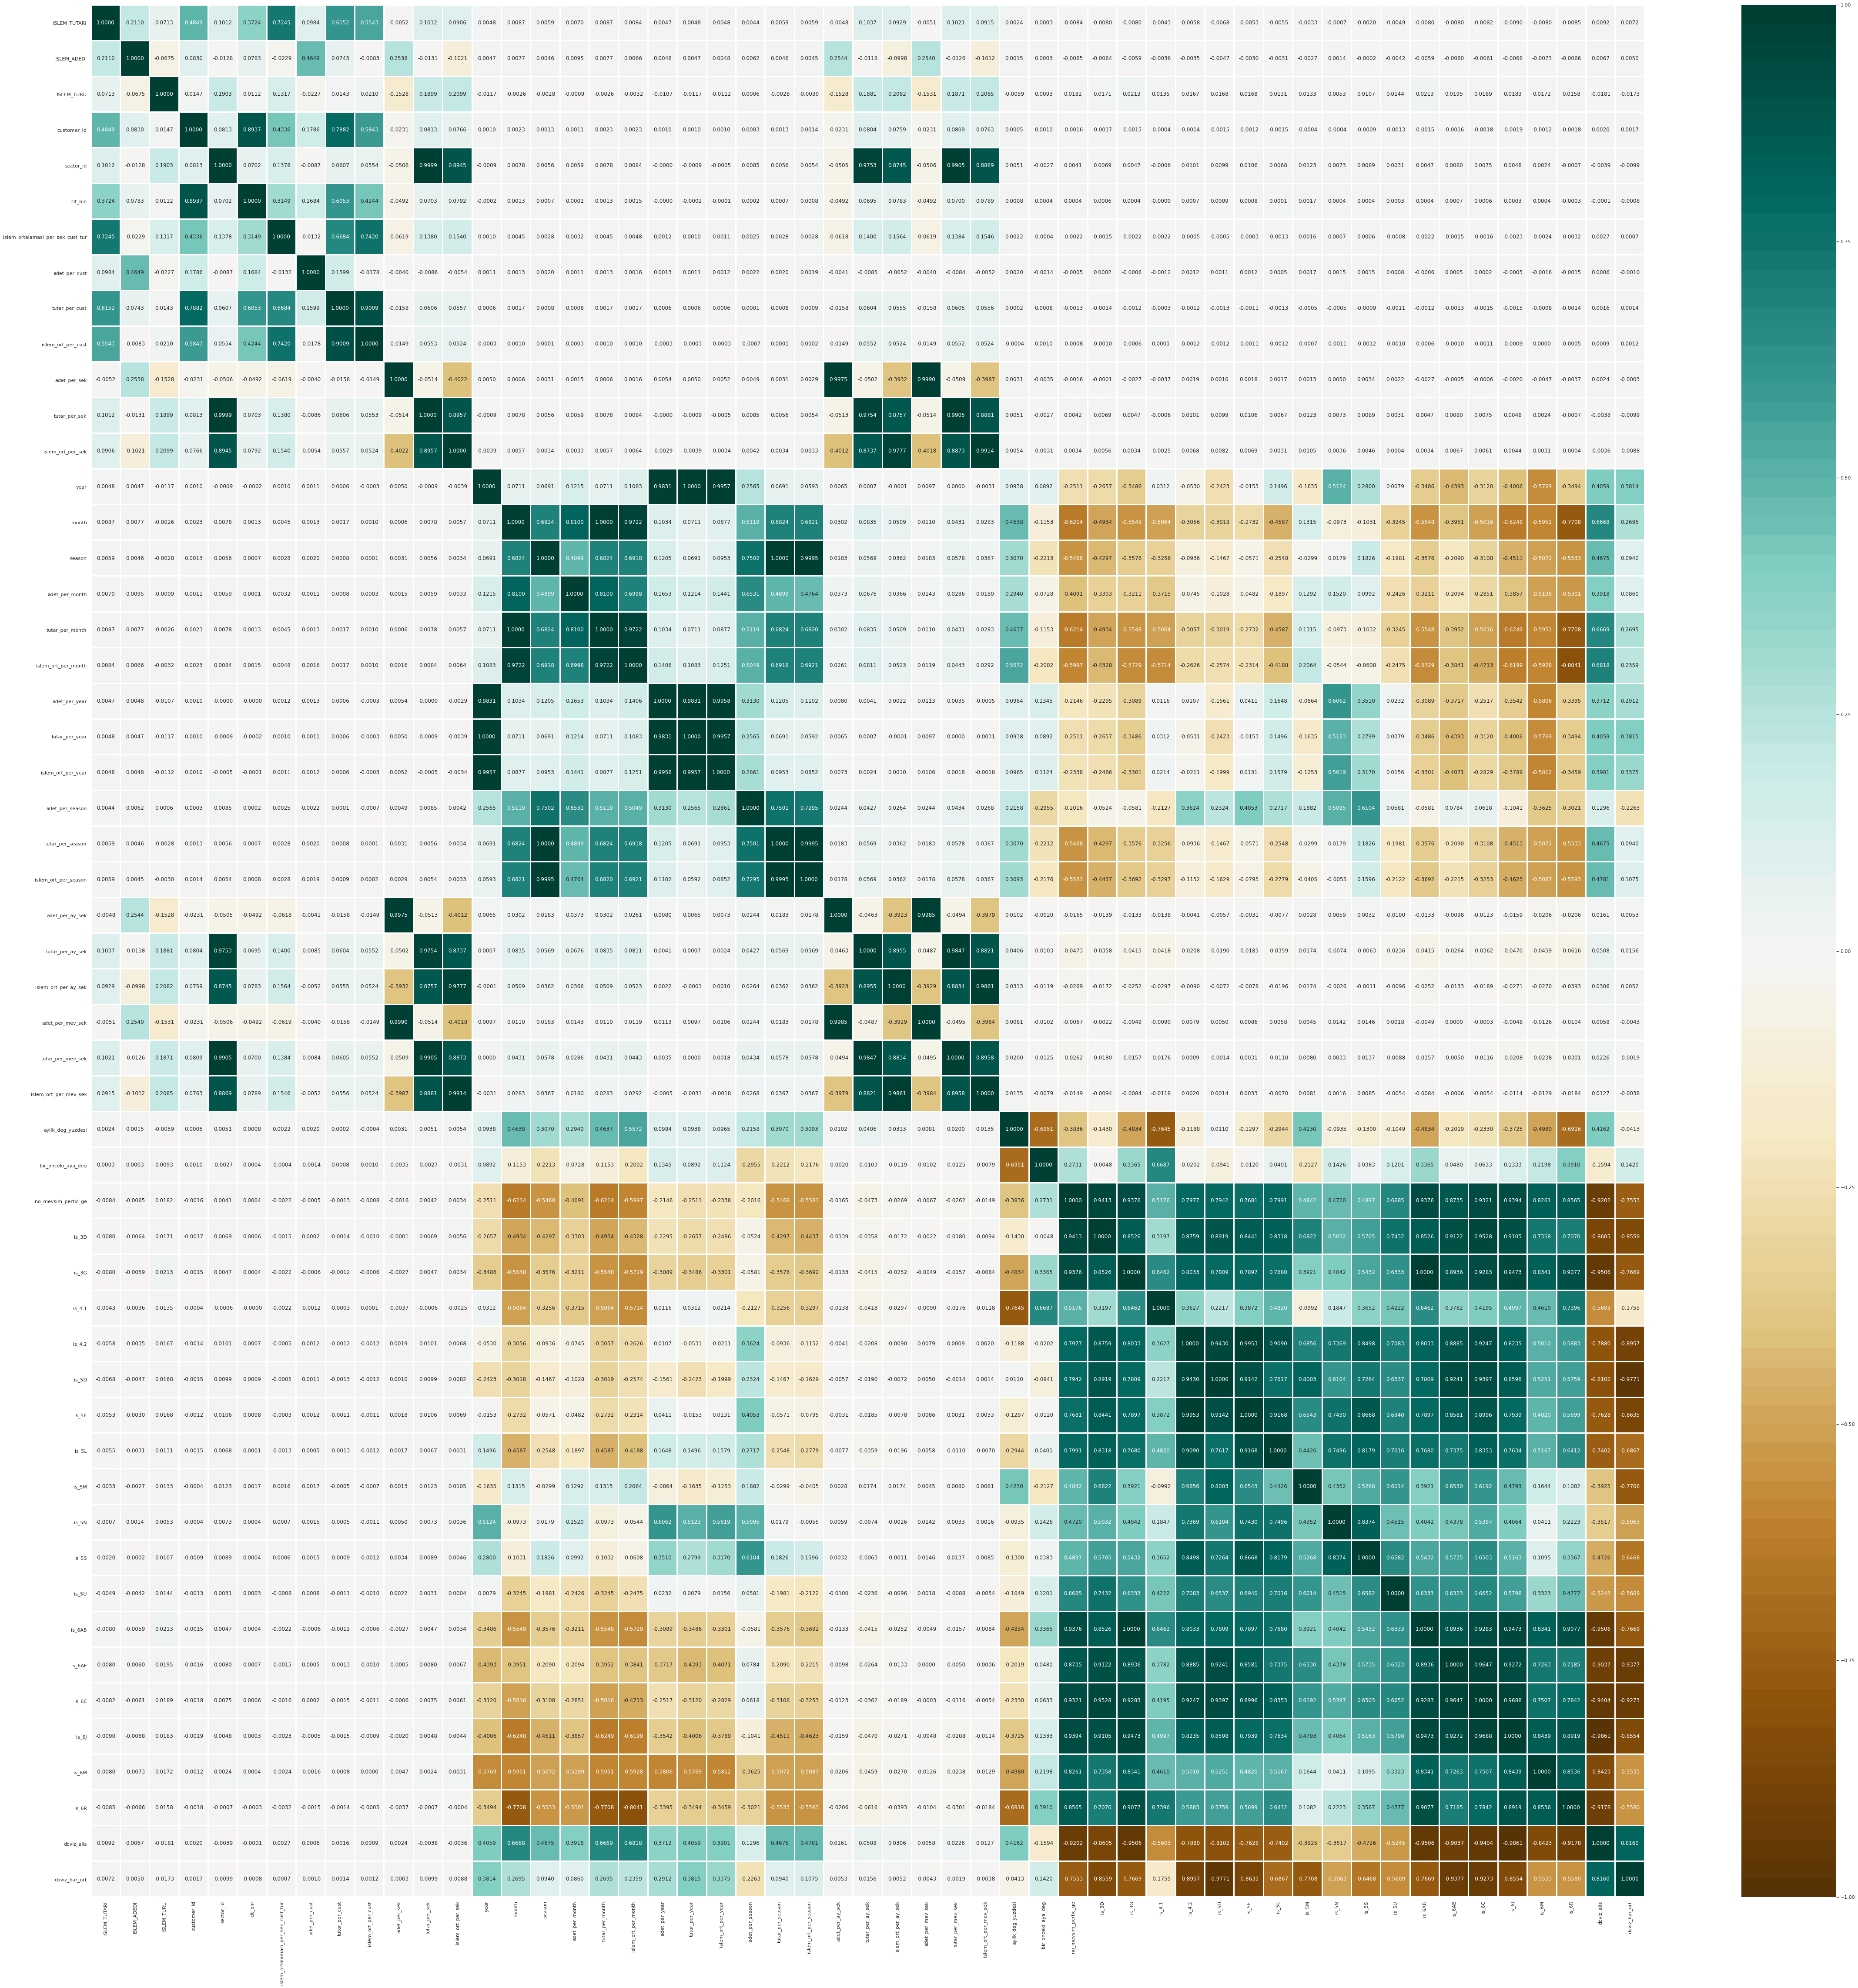

In [70]:
# calculate correlation
train_corr = df_train.corr()

# correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(80,80))
sns.heatmap(train_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=2, cmap = sns.color_palette("BrBG", 100))
#plt.yticks(rotation=0)
plt.show()

xgboost feature importance deneylerinden şüpheli görünen feature'lar:
* year, islem_ort_per_season, tutar_per_year, adet_per_season, tutar_per_season, is_5m, is_6J, is_6r

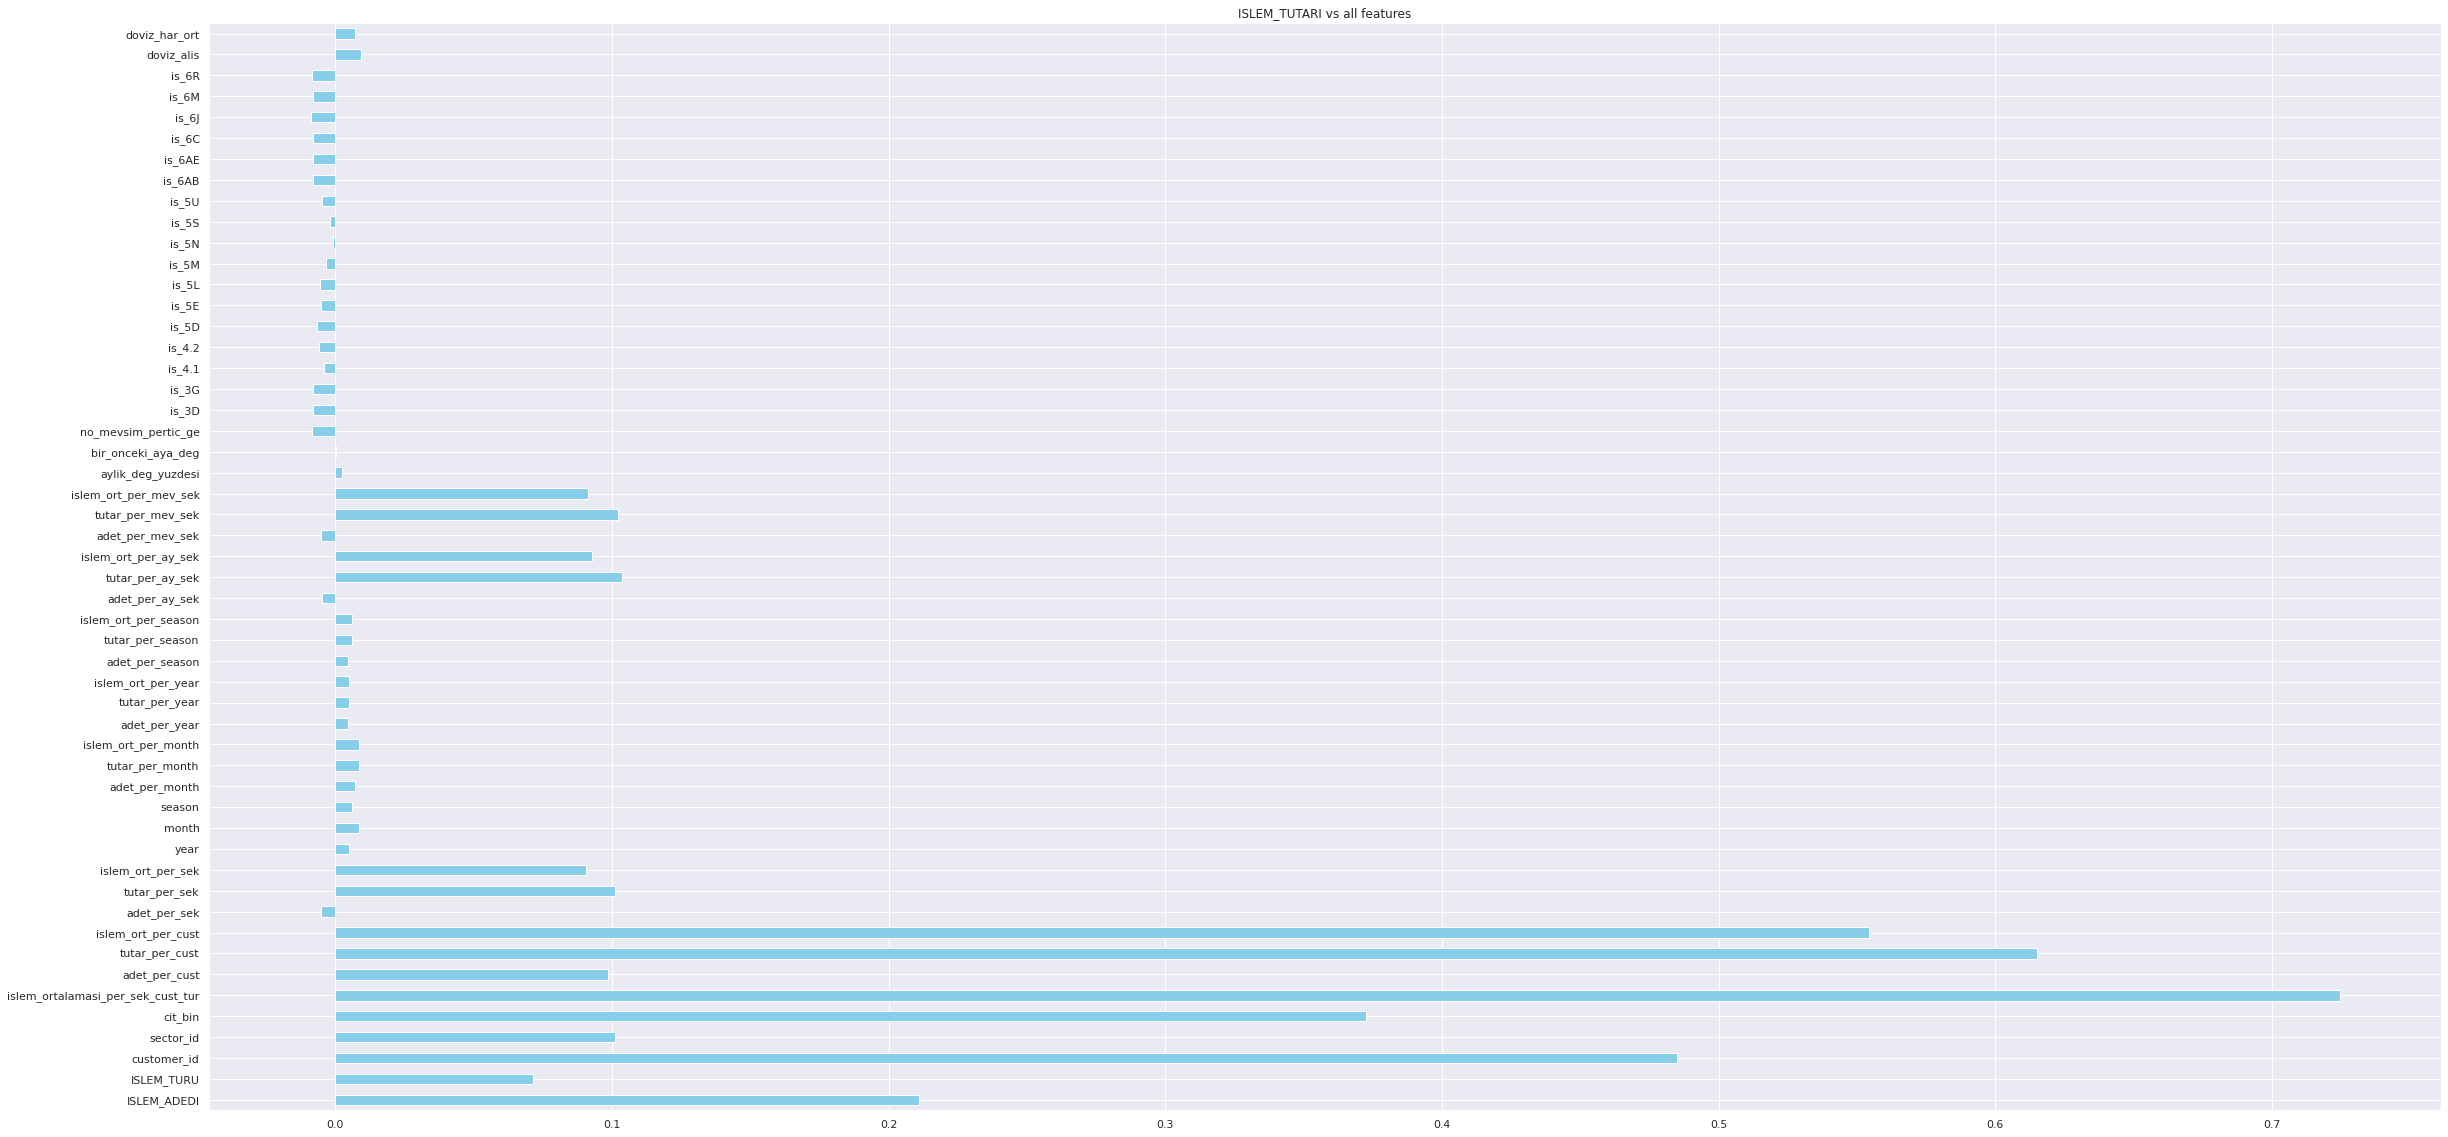

In [71]:
#feature importance using corr
df_train.drop('ISLEM_TUTARI', axis=1).corrwith(df_train.ISLEM_TUTARI).plot(kind='barh', figsize=(40, 20), color='skyblue', title="ISLEM_TUTARI vs all features")

In [72]:
train_X=train_X.drop(columns=["islem_ort_per_season", "tutar_per_year", "adet_per_season", "tutar_per_season", "adet_per_year", "year", "is_5N","is_5S"])

In [73]:
normalized_test_df=normalized_test_df.drop(columns=["islem_ort_per_season", "tutar_per_year", "adet_per_season", "tutar_per_season", "adet_per_year", "year", "is_5N","is_5S"])

# PCA


In [74]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526227 entries, 0 to 3526226
Data columns (total 44 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   ISLEM_ADEDI                        float64
 1   ISLEM_TURU                         float64
 2   customer_id                        float64
 3   sector_id                          float64
 4   cit_bin                            float64
 5   islem_ortalamasi_per_sek_cust_tur  float64
 6   adet_per_cust                      float64
 7   tutar_per_cust                     float64
 8   islem_ort_per_cust                 float64
 9   adet_per_sek                       float64
 10  tutar_per_sek                      float64
 11  islem_ort_per_sek                  float64
 12  month                              float64
 13  season                             float64
 14  adet_per_month                     float64
 15  tutar_per_month                    float64
 16  islem_ort_per_mont

In [75]:
#ek bilgiler 20 --> dimension=3
from sklearn.decomposition import PCA

#ek bilgiler pca
train_ek_bilgiler=train_X.iloc[: , 24:42]
test_ek_bilgiler=normalized_test_df.iloc[: , 24:42]

#alt alta concat ediyoruz
concat_ek_bilgiler=pd.concat([train_ek_bilgiler, test_ek_bilgiler], axis=0)


pca = PCA(n_components=3)
reduced_ek_bilgiler=pca.fit_transform(concat_ek_bilgiler)
reduced_ek_df=pd.DataFrame(reduced_ek_bilgiler, columns=["pca_ek1", "pca_ek2", "pca_ek3"])


In [76]:
#doviz pca
train_doviz=train_X.iloc[: , 42:]
test_doviz=normalized_test_df.iloc[: , 42:]


#alt alta concat ediyoruz
concat_doviz=pd.concat([train_doviz, test_doviz], axis=0)


pca_1 = PCA(n_components=1)
reduced_doviz=pca_1.fit_transform(concat_doviz)
reduced_doviz_df=pd.DataFrame(reduced_doviz, columns=["pca_doviz1"])


In [77]:
#drop non-pca cols
cols=list(range(24, 44))
dropped_train_x=train_X.drop(train_X.columns[cols],axis=1)

dropped_test_x=normalized_test_df.drop(normalized_test_df.columns[cols],axis=1)


In [78]:
#concat three dfs(train,ek_bilgiler, doviz)

reduced_train_X=pd.concat([dropped_train_x, reduced_ek_df.loc[0:len(train_X)-1, :], reduced_doviz_df.loc[0:len(train_X)-1, :]], axis=1)

reduced_test_X=pd.concat([dropped_test_x, reduced_ek_df.loc[len(train_X): , :].reset_index(drop=True), reduced_doviz_df.loc[len(train_X): , :].reset_index(drop=True)], axis=1)

In [79]:
reduced_train_X.to_csv('reduced_train_X.csv')
reduced_test_X.to_csv('reduced_test_X.csv')

df_y=pd.DataFrame(train_y, columns=['ISLEM_TUTARI_Y'])
df_y.to_csv('train_y.csv')

# pps correlation

In [80]:
reduced_train_X["ISLEM_TUTARI"]=train_y

In [81]:
import ppscore as pps
pps.score(reduced_train_X, "customer_id", "ISLEM_TUTARI")

{'x': 'customer_id',
 'y': 'ISLEM_TUTARI',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 338.84937599999995,
 'model_score': 495.3203316666667,
 'model': DecisionTreeRegressor()}

In [82]:
pps_df=pps.matrix(reduced_train_X)

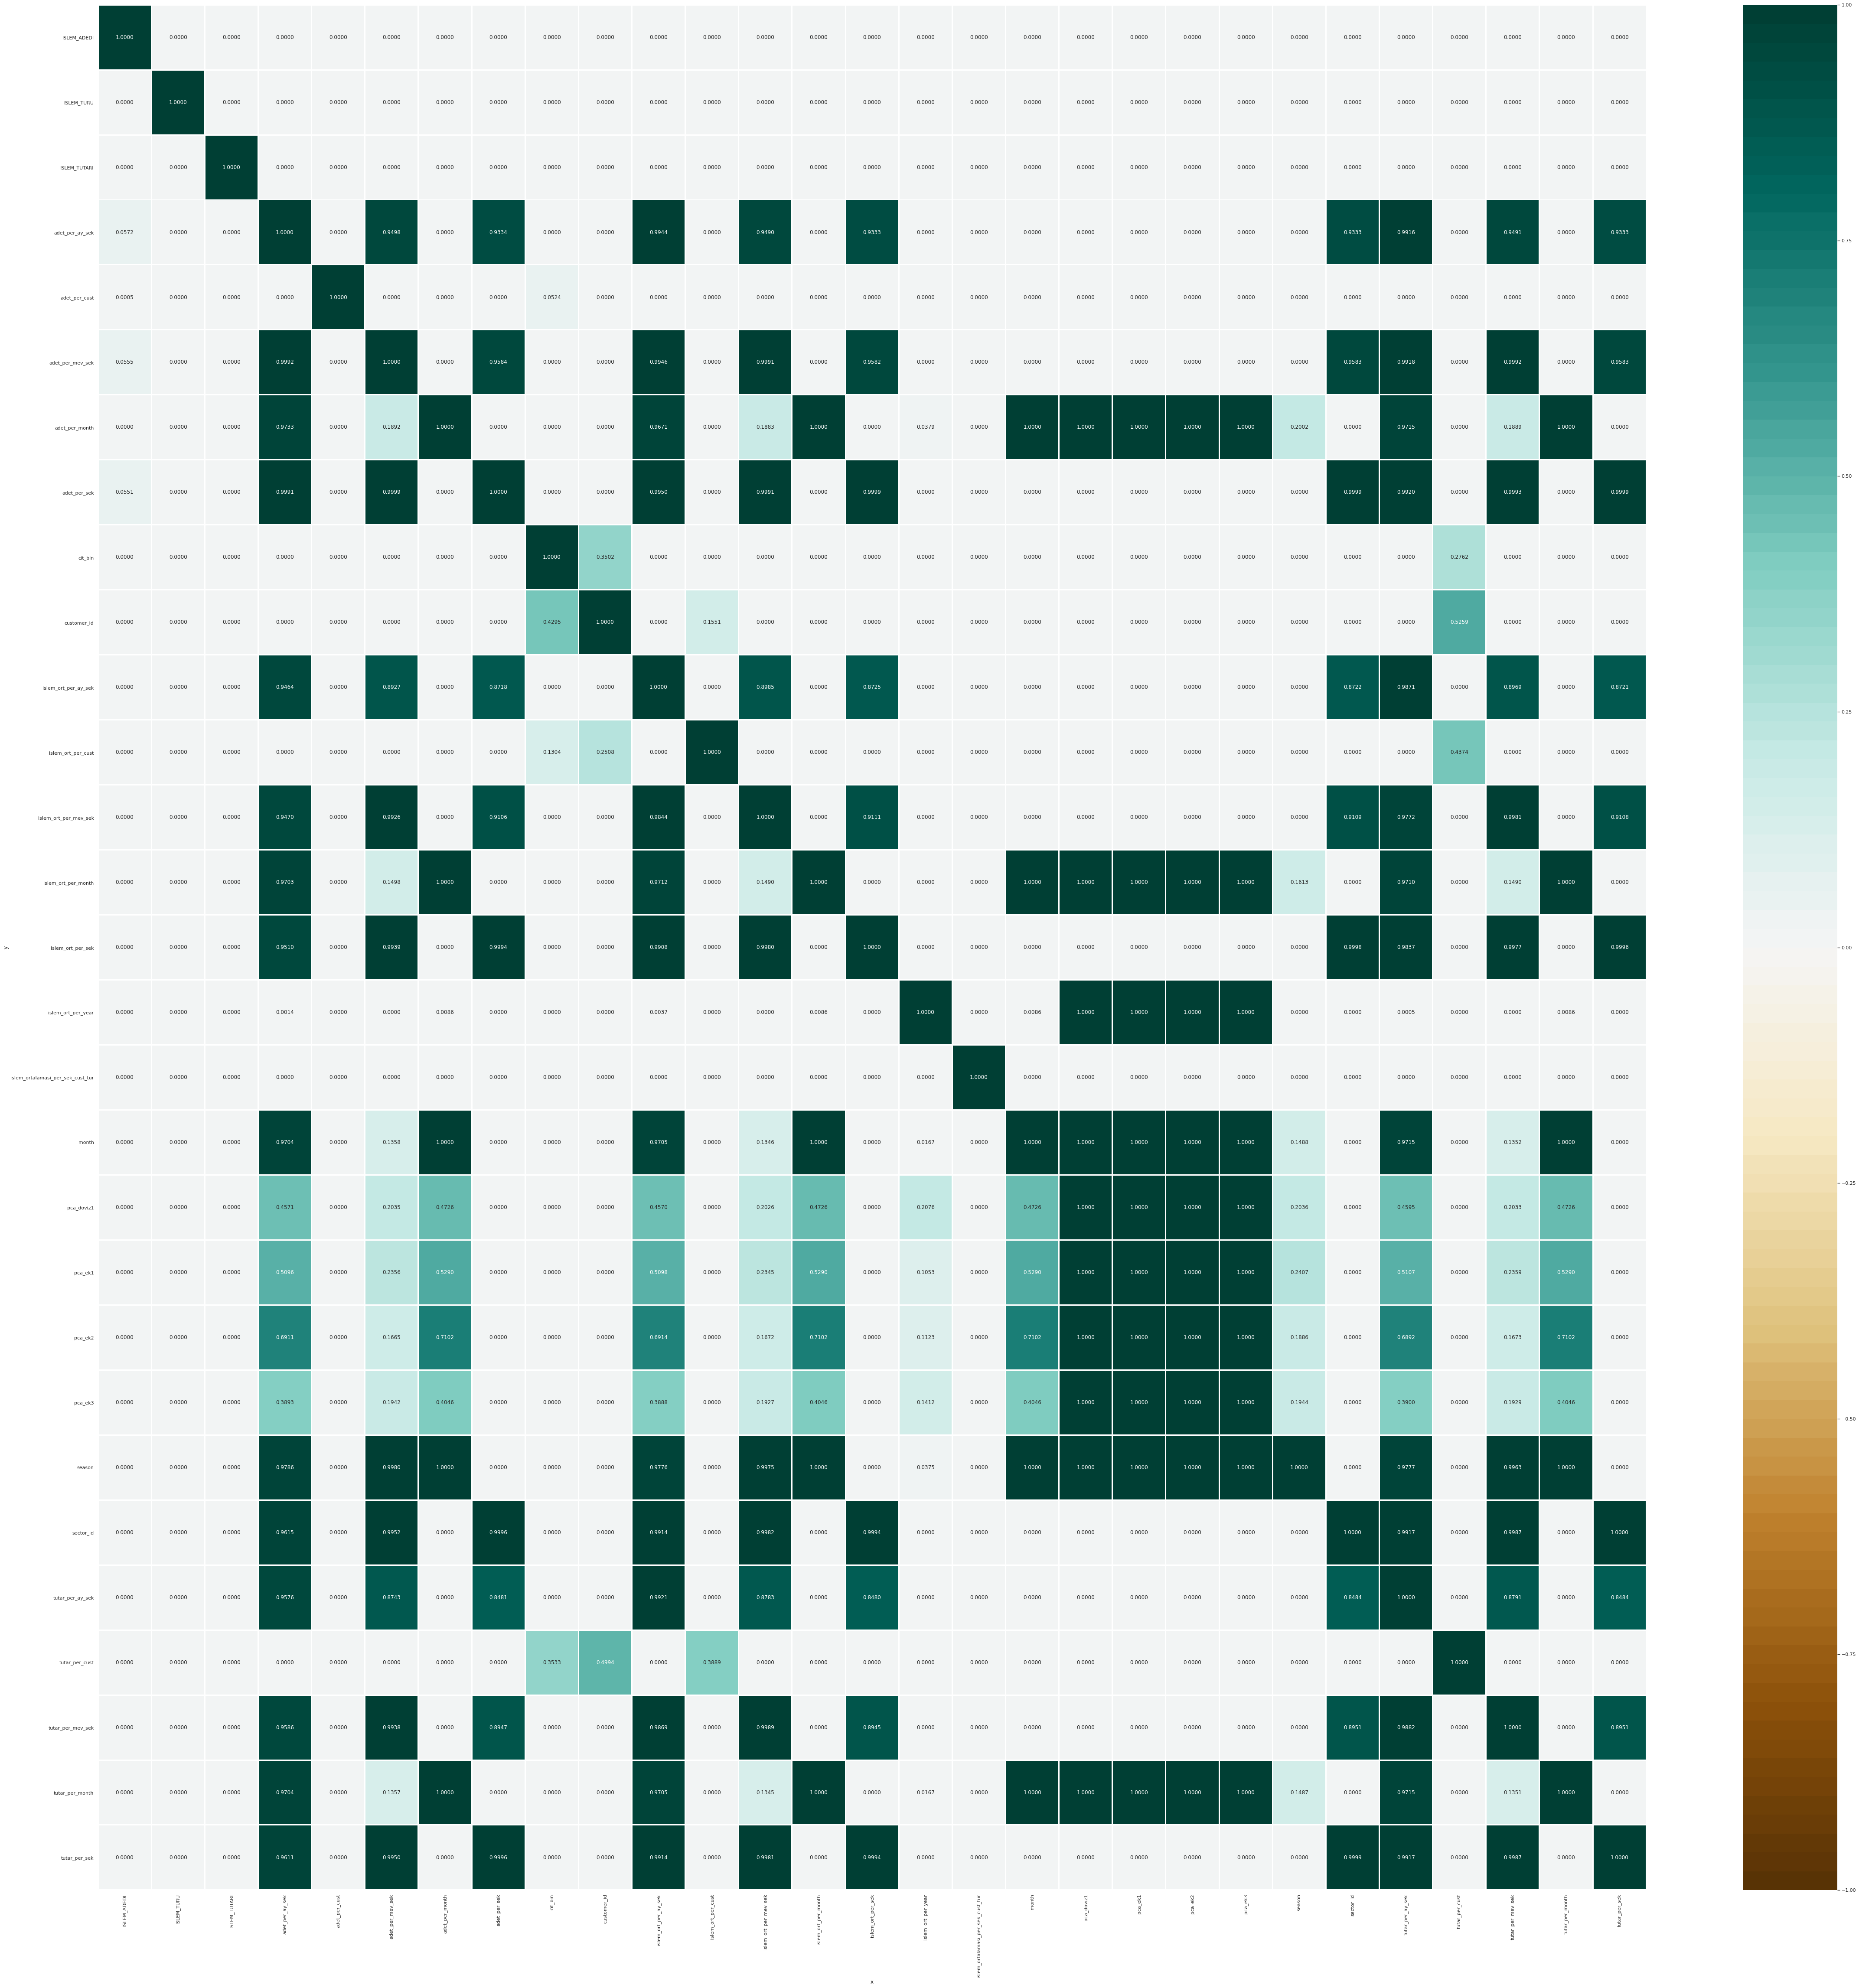

In [83]:
import seaborn as sns
matrix_df = pps_df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(80,80))
sns.heatmap(matrix_df, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=2, cmap = sns.color_palette("BrBG", 100))
#plt.yticks(rotation=0)
plt.show()